## GBM Family

### 1. Ready to analysis

#### 1) Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from xgboost import plot_importance
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, plot_importance

from datetime import datetime

from tqdm import tqdm

import warnings
warnings.filterwarnings(action='ignore')

#### 2) Load dataset

In [2]:
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["class"])
df = pd.concat([X, y], axis=1)
print(df.shape)
df

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### 3) EDA & Pre-process

In [4]:
y.value_counts()

class
0        50
1        50
2        50
dtype: int64

In [5]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
X_pca.shape

(150, 3)

(3, 50)
(3, 50)
(3, 50)


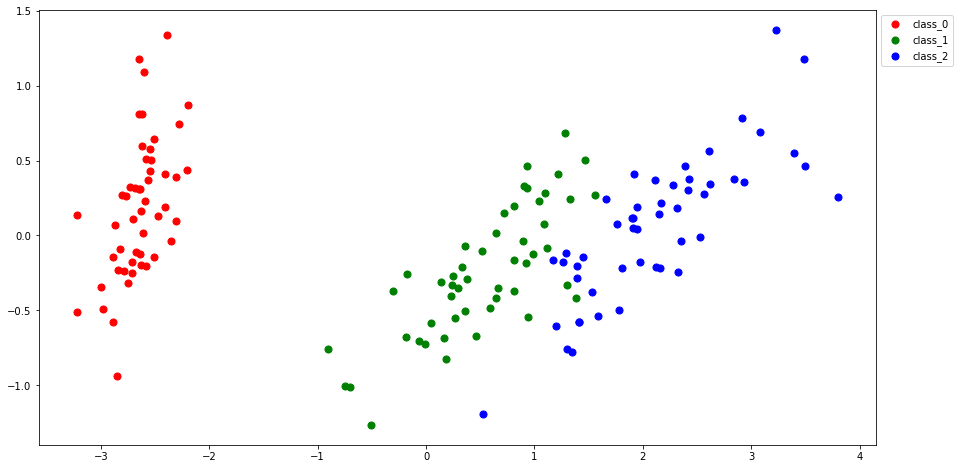

In [6]:
index_0 = df[df['class'] == 0].index
index_1 = df[df['class'] == 1].index
index_2 = df[df['class'] == 2].index

X_pca_0 = np.array([X_pca[i] for i in index_0]).T
X_pca_1 = np.array([X_pca[i] for i in index_1]).T
X_pca_2 = np.array([X_pca[i] for i in index_2]).T

print(X_pca_0.shape)
print(X_pca_1.shape)
print(X_pca_2.shape)



plt.figure(figsize=(15,8))
plt.scatter(X_pca_0[0], X_pca_0[1], label = 'class_0', c = 'r', s = 50)
plt.scatter(X_pca_1[0], X_pca_1[1], label = 'class_1', c = 'g', s = 50)
plt.scatter(X_pca_2[0], X_pca_2[1], label = 'class_2', c = 'b', s = 50)

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

plt.savefig('C:/Users/kw764/Desktop/튜토리얼이미지/dataset_distribution.png',
            edgecolor='k', 
            format='png', 
            dpi=200)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
# split train & validate & test set

X_tr, X_tmp, y_tr, y_tmp = train_test_split(X, y, test_size = 0.4, random_state=1)
X_val, X_te, y_val, y_te = train_test_split(X_tmp, y_tmp, test_size = 0.5, random_state=1)

print(X_tr.shape)
print(y_tr.value_counts())
print(X_val.shape)
print(y_val.value_counts())
print(X_te.shape)
print(y_te.value_counts())

(90, 4)
class
0        31
2        30
1        29
dtype: int64
(30, 4)
class
1        11
2        10
0         9
dtype: int64
(30, 4)
class
0        10
1        10
2        10
dtype: int64


### 2. Main analysis

#### 1) Gradient Boost Machine

In [9]:
start_time = datetime.now().replace(microsecond=0)


gbm = GradientBoostingClassifier()

gbm.fit(X_tr, y_tr)
gbm_params = {
    'n_estimators' : [100, 200, 300 ,400, 500], 
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2], 
    'max_depth' : [1, 2, 3, 4, 5]
}

gbm_search = GridSearchCV(gbm, param_grid = gbm_params, scoring="accuracy", n_jobs= -1, verbose = 1)
gbm_search.fit(X_val, y_val)
print("hyperparameter : ", gbm_search.best_params_)

gbm_tune = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.01, max_depth = 1, random_state = 333)
gbm_tune.fit(X_tr, y_tr)

gbm_pred = gbm_tune.predict(X_te)
print("---Confusion Matrix---")
print(confusion_matrix(y_te, gbm_pred))
print(" ")
print("---Index for Evaluation---")
print(classification_report(y_te, gbm_pred))

end_time = datetime.now().replace(microsecond=0)
print(f"processing time {end_time - start_time}")

Fitting 5 folds for each of 125 candidates, totalling 625 fits
hyperparameter :  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}
---Confusion Matrix---
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
 
---Index for Evaluation---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

processing time 0:00:31


#### 2) eXtreme Gradient Boost

In [10]:
start_time = datetime.now().replace(microsecond=0)


xgb = XGBClassifier()

xgb.fit(X_tr, y_tr)
xgb_params = {
    'n_estimators' : [100, 200, 300 ,400, 500], 
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2], 
    'max_depth' : [1, 2, 3, 4, 5]
}

xgb_search = GridSearchCV(xgb, param_grid = xgb_params, scoring="accuracy", n_jobs= -1, verbose = 1)
xgb_search.fit(X_val, y_val)
print("hyperparameter : ", xgb_search.best_params_)

xgb_tune = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.01, max_depth = 1, random_state = 333)
xgb_tune.fit(X_tr, y_tr)

xgb_pred = xgb_tune.predict(X_te)
print("---Confusion Matrix---")
print(confusion_matrix(y_te, xgb_pred))
print(" ")
print("---Index for Evaluation---")
print(classification_report(y_te, xgb_pred))

end_time = datetime.now().replace(microsecond=0)
print(f"processing time {end_time - start_time}")

Fitting 5 folds for each of 125 candidates, totalling 625 fits
hyperparameter :  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}
---Confusion Matrix---
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
 
---Index for Evaluation---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

processing time 0:00:06


#### 3) Light GBM

In [11]:
start_time = datetime.now().replace(microsecond=0)


lgb = LGBMClassifier()

lgb.fit(X_tr, y_tr)
lgb_params = {
    'n_estimators' : [100, 200, 300 ,400, 500], 
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2], 
    'max_depth' : [1, 2, 3, 4, 5]
}

lgb_search = GridSearchCV(lgb, param_grid = lgb_params, scoring="accuracy", n_jobs= -1, verbose = 1)
lgb_search.fit(X_val, y_val)
print("hyperparameter : ", lgb_search.best_params_)

lgb_tune = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.01, max_depth = 1, random_state = 333)
lgb_tune.fit(X_tr, y_tr)

lgb_pred = lgb_tune.predict(X_te)
print("---Confusion Matrix---")
print(confusion_matrix(y_te, lgb_pred))
print(" ")
print("---Index for Evaluation---")
print(classification_report(y_te, lgb_pred))

end_time = datetime.now().replace(microsecond=0)
print(f"processing time {end_time - start_time}")

Fitting 5 folds for each of 125 candidates, totalling 625 fits
hyperparameter :  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}
---Confusion Matrix---
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
 
---Index for Evaluation---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

processing time 0:00:02
